- 합성곱 신경망을 이용한 문장 분류(classification)

- 문장 I am a teacher
- 단어로 나누고 가장긴 단어에 맞춰서 0을 채워줌
- I 00000
- AM 0000
- A 00000
- TEACHER



In [ ]:
from tensorflow.keras.models     import Sequential , Model
from tensorflow.keras.layers     import Activation , Dense , BatchNormalization , Dropout ,Flatten, Conv1D, MaxPooling1D, Embedding, Reshape, concatenate, Conv2D, MaxPooling2D , AveragePooling2D , GlobalMaxPooling2D , ZeroPadding2D , Input
from tensorflow.keras.optimizers import SGD , Adam , RMSprop
from tensorflow.keras.utils      import plot_model , to_categorical
from tensorflow.keras.callbacks  import EarlyStopping , ModelCheckpoint
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.preprocessing.sequence import pad_sequences



from sklearn.model_selection     import train_test_split
from sklearn.preprocessing       import StandardScaler , MinMaxScaler , LabelEncoder
from sklearn.model_selection     import KFold
from sklearn.ensemble            import VotingClassifier
from sklearn.metrics             import accuracy_score



import matplotlib.pyplot as plt

import pandas  as pd
import numpy   as np
import seaborn as sns


# dataset
from tensorflow.keras.datasets import imdb




# from tensorflow.keras.datasets   import cifar10 , mnist



(X_train, y_train) , (X_test, y_test) = imdb.load_data()

In [ ]:
(X_train, y_train) , (X_test, y_test) = imdb.load_data(num_words=3000)

<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

BOW : 단어를 수치로 바꿔주는 것

In [ ]:
# X_train[0]
# y_train[0]

X_train = pad_sequences(X_train, maxlen = 300)
X_test = pad_sequences(X_test, maxlen=300)

X_train.shape, X_test.shape

((25000, 300), (25000, 300))

In [ ]:
# 1-D Conv

def sentence_cnn_1d() : 
  model = Sequential()

  model.add(Embedding(input_dim=3000 , output_dim=100 ,  input_length= 300) )  # 벡터화 # 위의 maxlen과 동일해야함
  model.add(Conv1D(filters = 50, kernel_size= 5, strides = 1, padding = 'valid' ) )
  model.add(MaxPooling1D(2, padding = 'valid') )

  model.add(Flatten())

  # classification 
  model.add (Dense (10))
  model.add ( Activation('relu'))

  # output
  model.add(Dense(1))
  model.add( Activation('sigmoid'))

  adam = Adam(lr=0.001)
  model.compile(loss = 'binary_crossentropy', optimizer = adam, metrics = ['accuracy'])

  return model

In [ ]:
model = sentence_cnn_1d()

In [ ]:
history = model.fit(X_train, y_train, batch_size = 50, validation_split = 0.2, epochs=10, verbose=1)

Epoch 1/10
400/400 [==============================] - 8s 13ms/step - loss: 0.5502 - accuracy: 0.6732 - val_loss: 0.3090 - val_accuracy: 0.8736
Epoch 2/10
400/400 [==============================] - 5s 12ms/step - loss: 0.2359 - accuracy: 0.9069 - val_loss: 0.3013 - val_accuracy: 0.8728
Epoch 3/10
400/400 [==============================] - 5s 12ms/step - loss: 0.1196 - accuracy: 0.9616 - val_loss: 0.3593 - val_accuracy: 0.8642
Epoch 4/10
400/400 [==============================] - 5s 12ms/step - loss: 0.0273 - accuracy: 0.9957 - val_loss: 0.4730 - val_accuracy: 0.8554
Epoch 5/10
400/400 [==============================] - 5s 12ms/step - loss: 0.0060 - accuracy: 0.9992 - val_loss: 0.5869 - val_accuracy: 0.8638
Epoch 6/10
400/400 [==============================] - 5s 12ms/step - loss: 0.0014 - accuracy: 0.9999 - val_loss: 0.6419 - val_accuracy: 0.8636
Epoch 7/10
400/400 [==============================] - 5s 12ms/step - loss: 3.2331e-04 - accuracy: 1.0000 - val_loss: 0.6779 - val_accuracy: 0.

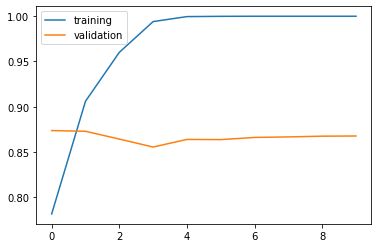

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'], loc = 'upper left')
plt.show()

In [ ]:
result = model.evaluate(X_test, y_test)
print('acc', result [1])

782/782 [==============================] - 3s 4ms/step - loss: 0.7351 - accuracy: 0.8669
acc 0.866919994354248


In [ ]:
X_train.shape, X_test.shape

((25000, 300), (25000, 300))

In [ ]:
# 2-D Conv

def sentence_cnn_2d() : 
  model = Sequential()

  model.add(Embedding(input_dim=3000 , output_dim=100 ,  input_length= 300) )  # 벡터화 # 위의 maxlen과 동일해야함
  model.add( Reshape( (300, 100, 1), input_shape = (300, 100)) )

  model.add(Conv2D(filters = 50, kernel_size= (5,100), strides = (1,1), padding = 'valid' ) )
  # model.add(MaxPooling2D( (2,2), padding = 'valid') )
  model.add( GlobalMaxPooling2D() )

  # model.add(Flatten()) Globalmaxpooling이 flatten 까지 같이해줌 

  # classification 
  model.add (Dense (10))
  model.add ( Activation('relu'))
  model.add (Dropout(0.3))

  model.add (Dense (10))
  model.add ( Activation('relu'))
  model.add (Dropout(0.3))

  # output
  model.add(Dense(1))
  model.add( Activation('sigmoid'))

  adam = Adam(lr=0.001)
  model.compile(loss = 'binary_crossentropy', optimizer = adam, metrics = ['accuracy'])

  return model

In [ ]:
model = sentence_cnn_2d()

In [ ]:
history = model.fit(X_train, y_train, batch_size = 50, validation_split = 0.2, epochs=10, verbose=1)

Epoch 1/10
400/400 [==============================] - 8s 19ms/step - loss: 0.6089 - accuracy: 0.6392 - val_loss: 0.3432 - val_accuracy: 0.8512
Epoch 2/10
400/400 [==============================] - 8s 19ms/step - loss: 0.3204 - accuracy: 0.8757 - val_loss: 0.2942 - val_accuracy: 0.8770
Epoch 3/10
400/400 [==============================] - 8s 19ms/step - loss: 0.2336 - accuracy: 0.9220 - val_loss: 0.2956 - val_accuracy: 0.8786
Epoch 4/10
400/400 [==============================] - 8s 19ms/step - loss: 0.1628 - accuracy: 0.9521 - val_loss: 0.3190 - val_accuracy: 0.8778
Epoch 5/10
400/400 [==============================] - 8s 19ms/step - loss: 0.1092 - accuracy: 0.9719 - val_loss: 0.3470 - val_accuracy: 0.8782
Epoch 6/10
400/400 [==============================] - 8s 20ms/step - loss: 0.0754 - accuracy: 0.9848 - val_loss: 0.4025 - val_accuracy: 0.8744
Epoch 7/10
400/400 [==============================] - 8s 20ms/step - loss: 0.0484 - accuracy: 0.9916 - val_loss: 0.4502 - val_accuracy: 0.8822

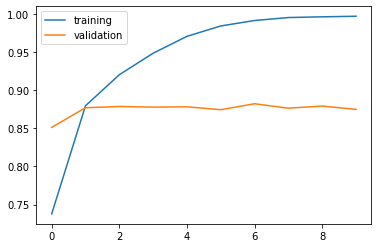

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'], loc = 'upper left')
plt.show()

In [ ]:
result = model.evaluate(X_test, y_test)
print('acc', result [1])

782/782 [==============================] - 7s 8ms/step - loss: 0.6411 - accuracy: 0.8658
acc 0.8658400177955627


In [ ]:
# 2-D Conv

def conv_ary():

  pass


def sentence_cnn_2d() : 
  model = Sequential()

  # feature extraction
  model.add(Embedding(input_dim=3000 , output_dim=100 ,  input_length= 300) )  # 벡터화 # 위의 maxlen과 동일해야함
  model.add( Reshape( (300, 100, 1), input_shape = (300, 100)) )
  model.add( Dropout(0.5))

  model.add(conv_ary())

  model.add(Flatten())

  # classification 
  model.add (Dense (10))
  model.add(BatchNormalization() )
  model.add ( Activation('relu'))
  model.add (Dropout(0.3))

  model.add (Dense (10))
  model.add(BatchNormalization() )
  model.add ( Activation('relu'))
  model.add (Dropout(0.3))

  # output
  model.add(Dense(1))
  model.add( Activation('sigmoid'))

  adam = Adam(lr=0.001)
  model.compile(loss = 'binary_crossentropy', optimizer = adam, metrics = ['accuracy'])

  return model

In [ ]:
model = sentence_cnn_2d()
model.summary() 

In [ ]:
callbacks = [EarlyStopping(monitor = 'val_accuracy', patience = 3)]
history = model.fit(X_train, y_train, batch_size = 50, validation_split = 0.2, epochs=20, verbose=1, callbacks=callbacks)

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'], loc = 'upper left')
plt.show()

In [ ]:
result = model.evaluate(X_test, y_test)
print('acc', result [1])

In [ ]:
# 2-D Conv

# 합성곱 연산을 적용하는 2-D Conv

# 합성곱 연산을 적용하는 레이어를 여러개 만들어서 성능을 개선

def conv_ary():

  conv_layer_ary = []
  inn = Input(shape = (300, 100, 1))

  size = [2,3,4,5]

  for s in size : 
    
    conv = Conv2D(filters = 100, kernel_size = (s,100), strides=(1,1), padding = 'valid')(inn)
    act = Activation('relu')(conv)
    pool = MaxPooling2D(pool_size = (300-s +1, 1) , padding = 'valid')(act)

    conv_layer_ary.append(pool)

  out = concatenate(conv_layer_ary)
  model = Model(inputs = inn, outputs = out)

  return model
  

def improve_sentence_cnn_2d() : 
  model = Sequential()

  # feature extraction
  model.add(Embedding(input_dim=3000 , output_dim=100 ,  input_length= 300) )  # 벡터화 # 위의 maxlen과 동일해야함
  model.add( Reshape( (300, 100, 1), input_shape = (300, 100)) )
  model.add( Dropout(0.5))

  model.add(conv_ary())

  model.add(Flatten())

  # classification 
  model.add (Dense (10))
  model.add(BatchNormalization() )
  model.add ( Activation('relu'))
  model.add (Dropout(0.3))

  model.add (Dense (10))
  model.add(BatchNormalization() )
  model.add ( Activation('relu'))
  model.add (Dropout(0.3))

  # output
  model.add(Dense(1))
  model.add( Activation('sigmoid'))

  adam = Adam(lr=0.001)
  model.compile(loss = 'binary_crossentropy', optimizer = adam, metrics = ['accuracy'])

  return model

In [ ]:
model = improve_sentence_cnn_2d()
model.summary() 

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 300, 100)          300000    
_________________________________________________________________
reshape_3 (Reshape)          (None, 300, 100, 1)       0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 300, 100, 1)       0         
_________________________________________________________________
model (Functional)           (None, 1, 1, 400)         140400    
_________________________________________________________________
flatten_1 (Flatten)          (None, 400)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                4010      
_________________________________________________________________
batch_normalization (BatchNo (None, 10)               

In [ ]:
callbacks = [EarlyStopping(monitor = 'val_accuracy', patience = 3)]
history = model.fit(X_train, y_train, batch_size = 50, validation_split = 0.2, epochs=20, verbose=1, callbacks=callbacks)

Epoch 1/20
400/400 [==============================] - 32s 74ms/step - loss: 0.6768 - accuracy: 0.5914 - val_loss: 0.4878 - val_accuracy: 0.8384
Epoch 2/20
400/400 [==============================] - 30s 75ms/step - loss: 0.4084 - accuracy: 0.8314 - val_loss: 0.2997 - val_accuracy: 0.8782
Epoch 3/20
400/400 [==============================] - 29s 73ms/step - loss: 0.3246 - accuracy: 0.8730 - val_loss: 0.2963 - val_accuracy: 0.8720
Epoch 4/20
400/400 [==============================] - 29s 73ms/step - loss: 0.2903 - accuracy: 0.8886 - val_loss: 0.3418 - val_accuracy: 0.8554
Epoch 5/20
400/400 [==============================] - 29s 74ms/step - loss: 0.2538 - accuracy: 0.9071 - val_loss: 0.2653 - val_accuracy: 0.8942
Epoch 6/20
400/400 [==============================] - 29s 73ms/step - loss: 0.2472 - accuracy: 0.9082 - val_loss: 0.2663 - val_accuracy: 0.8888
Epoch 7/20
400/400 [==============================] - 29s 73ms/step - loss: 0.2239 - accuracy: 0.9159 - val_loss: 0.3098 - val_accuracy:

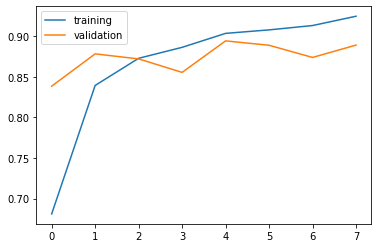

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'], loc = 'upper left')
plt.show()

In [ ]:
result = model.evaluate(X_test, y_test)
print('acc', result [1])

782/782 [==============================] - 26s 32ms/step - loss: 0.3017 - accuracy: 0.8859
acc 0.8858799934387207
